**TODO**
1) [ ] Oszacować jakość danych w pliku Metabolomics_Final.xlsx
    1)  Jest pułapka w pierwszych wynikach, może coś trzeba wyrzucić
    2) Zastanowić się dlaczego
2) [ ] Analiza końcowa
3) [ ] Wnioski

**4 grupy badane:**
1) samice próbne i kontrolne
2) samce próbne i kontrolne
3) Blanks
4) QC (Quality Control)

**Raport:**
1) Prosta klasyfikacja, wskazanie struktury
2) szacowanie jakości danych
    Na jakiej podstawie i jak osiągnęliśmy wyniki
    Możliwość sprawdzenia
    Jak poszczególne zmienne wyglądają w blanku i czy jest sens je odrzucać

Termin: **10.04**


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
def pca_analysis(data: np.ndarray) -> pd.DataFrame:
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    return pca_df

In [25]:
def data_loader(PATH: str) -> pd.DataFrame:
    data = pd.read_excel(PATH)
    return data

In [26]:
def drop_name_columns(data: pd.DataFrame) -> pd.DataFrame:
    data = data.drop(columns=['Name', 'Group'])
    return data

In [27]:
def data_normaliser(data: np.ndarray) -> np.ndarray:
    scaler = StandardScaler()
    return scaler.fit_transform(data)

In [28]:
# Path to file
PATH = '/home/szymon/Documents/analizy_omiczne/Omics25/zajecia3/Metabolomics_Final.xlsx'

In [50]:
# load data
full_data = data_loader(PATH)
numeric_data = drop_name_columns(full_data)
labels = full_data['Group']  # Pobranie etykiet z kolumny 'Group'

In [30]:
# Same data but in different formats (pd.DataFrame and np.ndarray)
data_df = numeric_data
data_columns = numeric_data.columns
data_np = numeric_data.to_numpy()

In [31]:
# Normalised data (mean = 0, std = 1)
scaled_data = data_normaliser(data_np)

# Check if data is scaled properly
if not np.isclose(scaled_data.mean(), 0, atol=1e-6) or not np.isclose(scaled_data.std(), 1, atol=1e-6):
    exit('Data is not scaled properly')
else:
    print('Data is scaled properly')

Data is scaled properly


In [35]:
# PCA analisys
pca_df = pca_analysis(scaled_data)
pca_df

,PC1,PC2
0,31.872908,8.764099
1,32.291677,9.203380
2,33.618342,8.997338
3,34.783559,9.788042
4,34.331812,9.655663
...,...,...
101,-6.455263,3.224839
102,-0.518646,1.223804
103,-4.271068,5.791956
104,-5.595373,0.887178


In [38]:
PC1 = pca_df['PC1']
PC2 = pca_df['PC2']

In [46]:
# Podział na kategorie
categories = {
    'Male': pca_df[labels.str.startswith('M')],
    'Female': pca_df[labels.str.startswith('F')],
    'Blank': pca_df[labels == 'Blank'],
    'QC': pca_df[labels == 'QC']
}

colors = {'Male': 'blue', 'Female': 'red', 'Blank': 'green', 'QC': 'purple'}
markers = {'Male': '.', 'Female': '.', 'Blank': 's', 'QC': '^'}

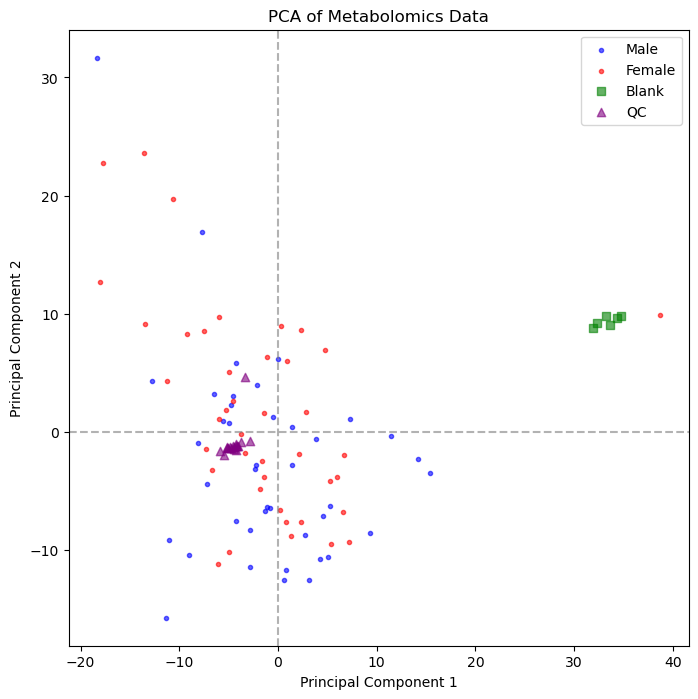

In [47]:
# Wizualizacja wyników PCA
plt.figure(figsize=(8, 8))

for label, subset in categories.items():
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.6, color=colors[label], marker=markers[label])

plt.axhline(y = 0, color='grey', linestyle='--', alpha=0.6)
plt.axvline(x = 0, color='grey', linestyle='--', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Metabolomics Data")
plt.legend()
plt.show()

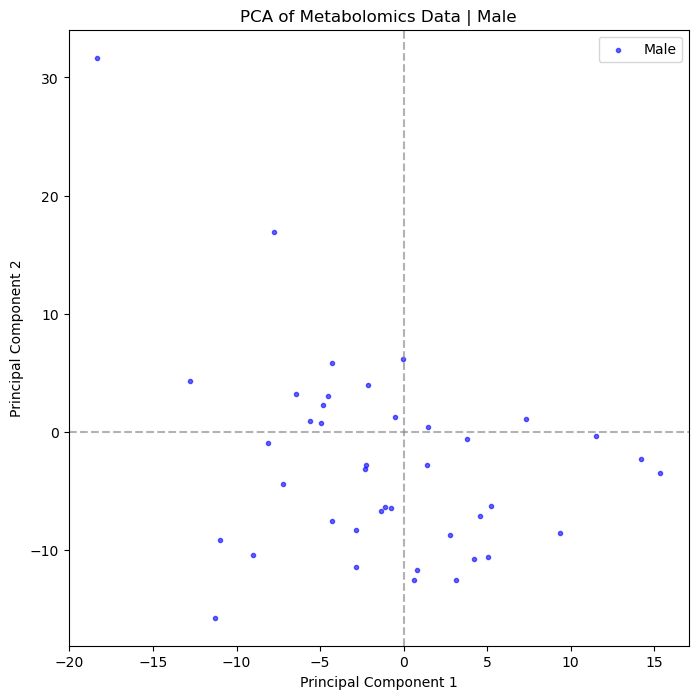

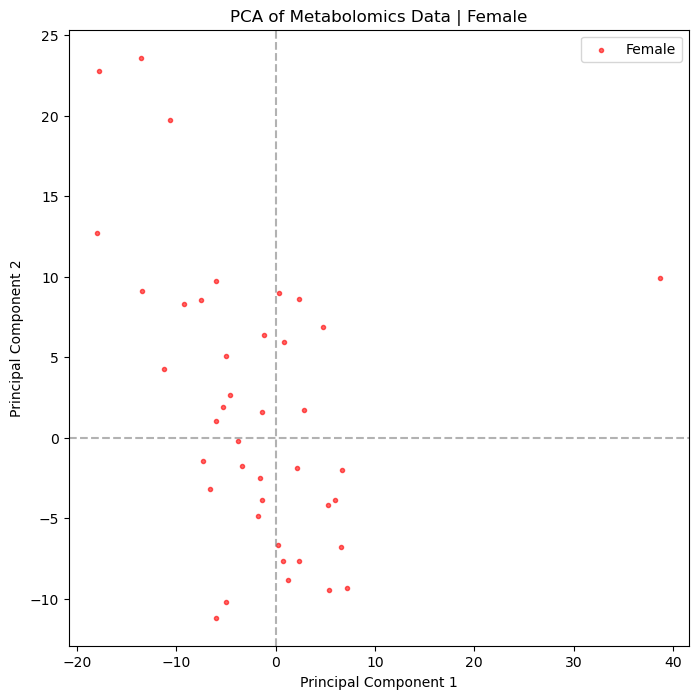

In [48]:
for label, subset in categories.items():

    if label == "Blank" or label == 'QC':
        continue

    plt.figure(figsize=(8, 8))
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.6, color=colors[label], marker=markers[label])

    plt.axhline(y = 0, color='grey', linestyle='--', alpha=0.6)
    plt.axvline(x = 0, color='grey', linestyle='--', alpha=0.6)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"PCA of Metabolomics Data | {label}")
    plt.legend()
    plt.show()

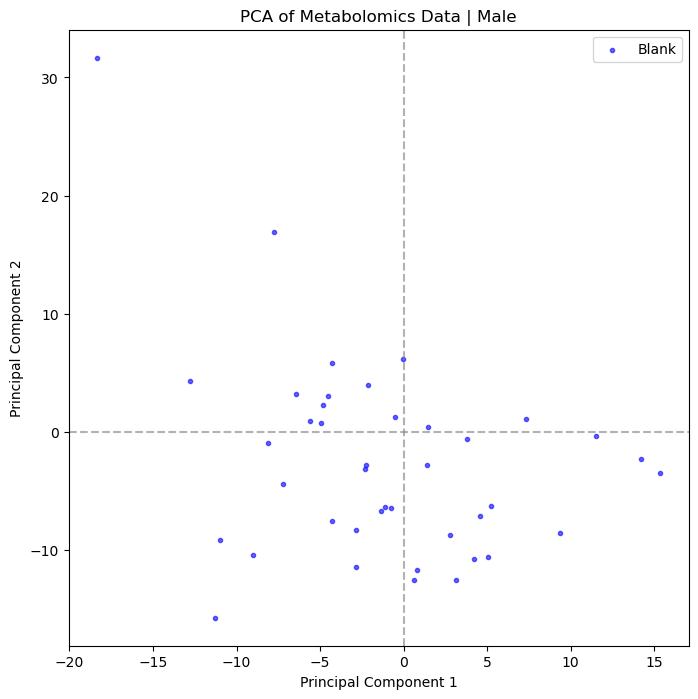

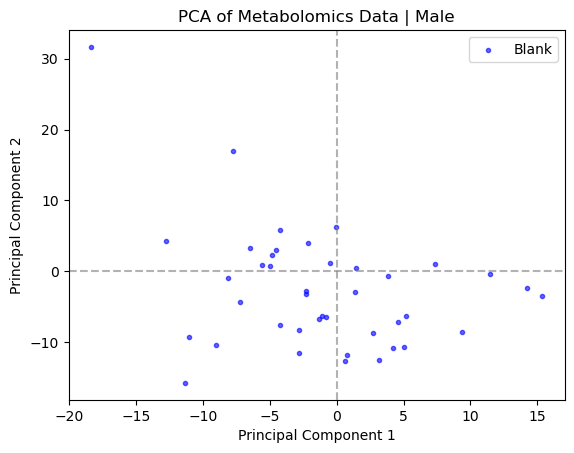

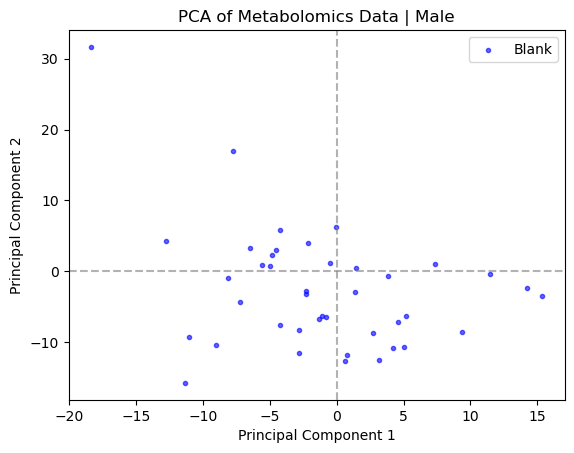

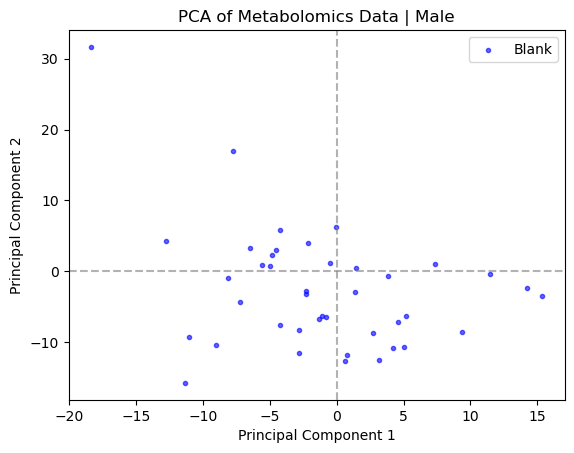

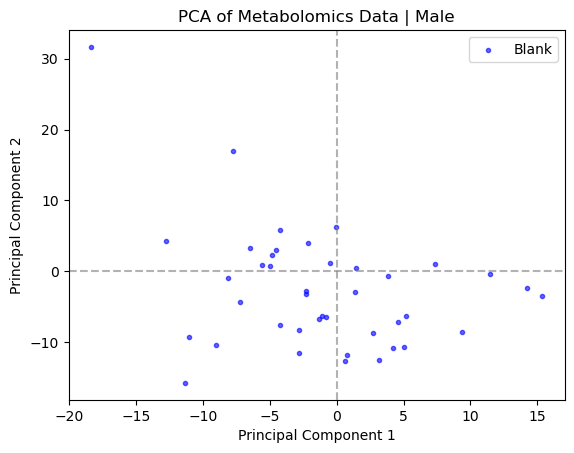

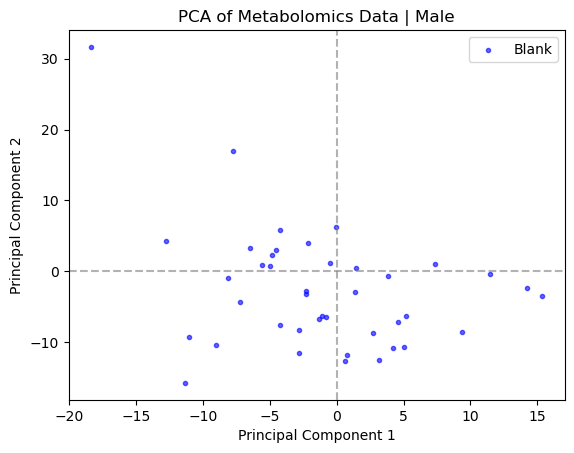

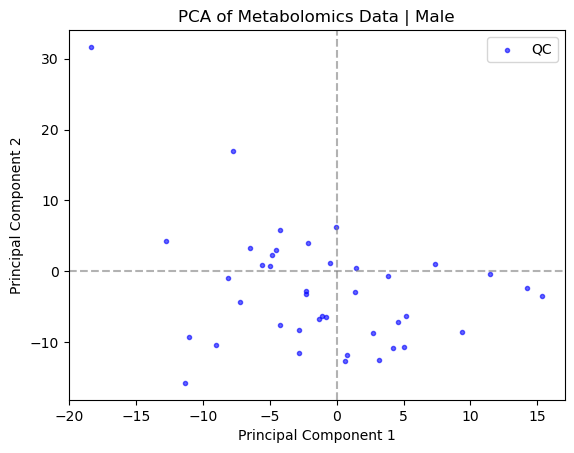

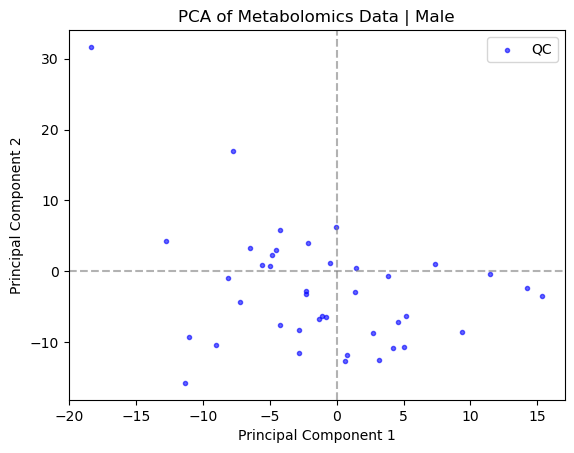

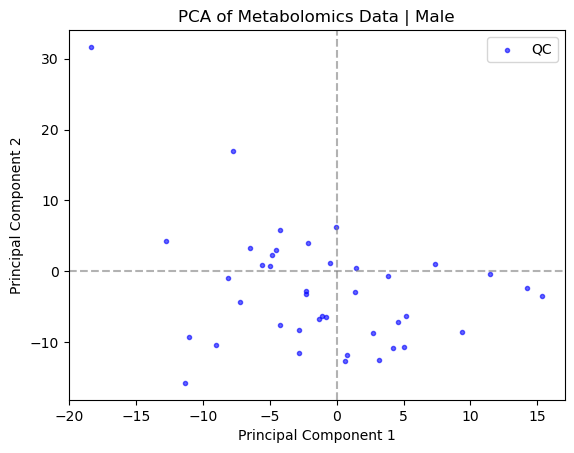

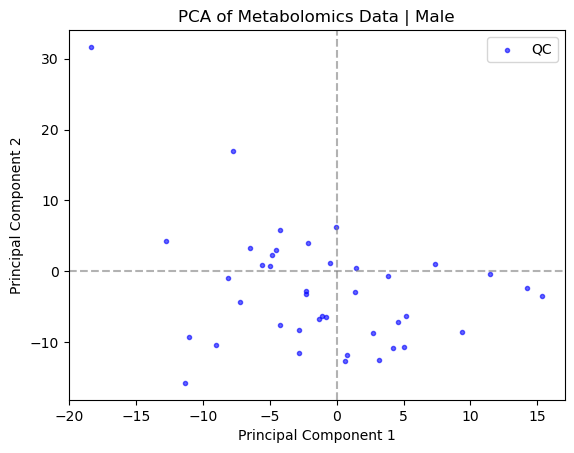

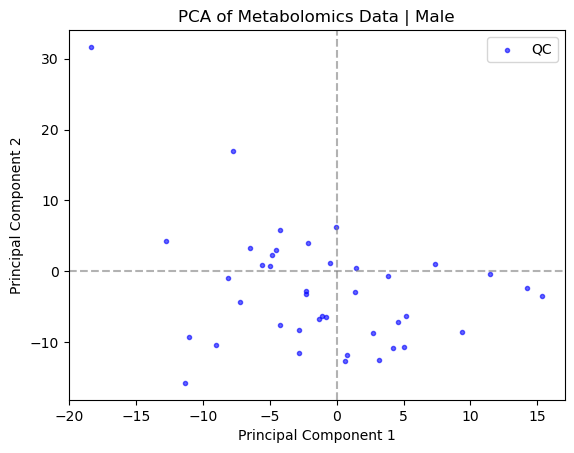

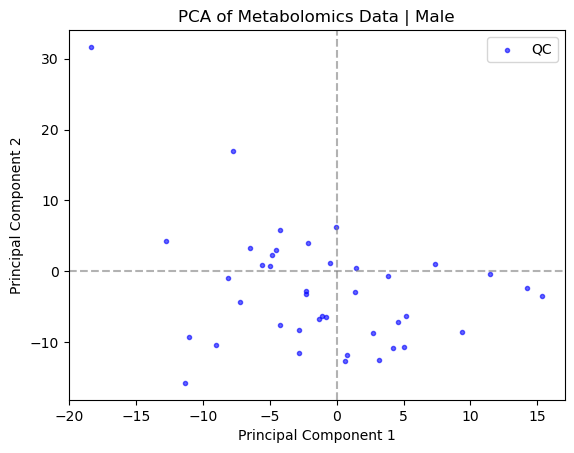

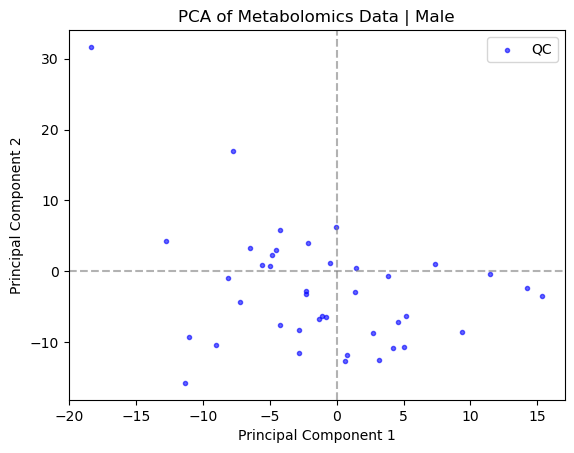

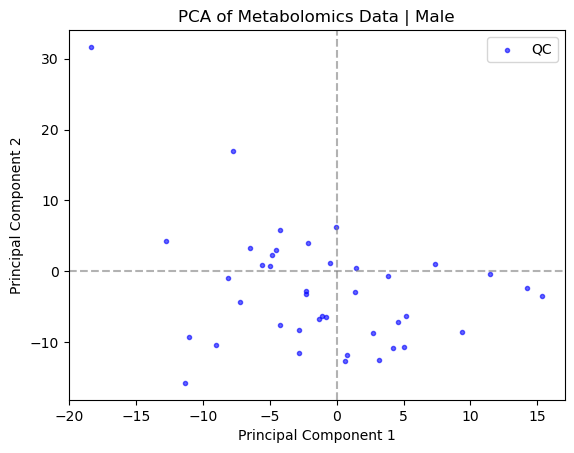

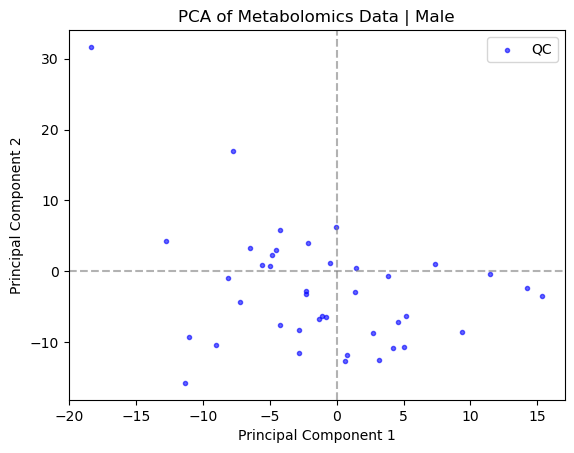

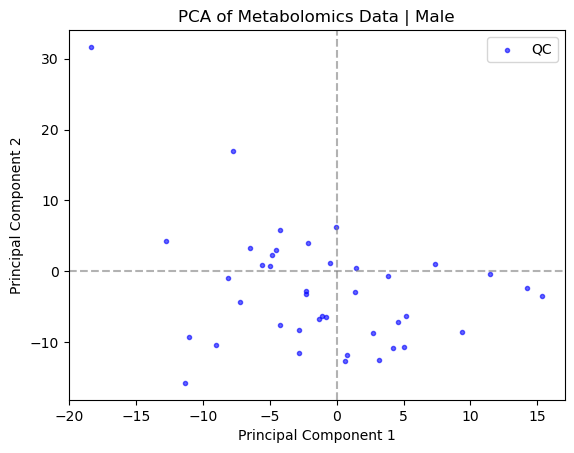

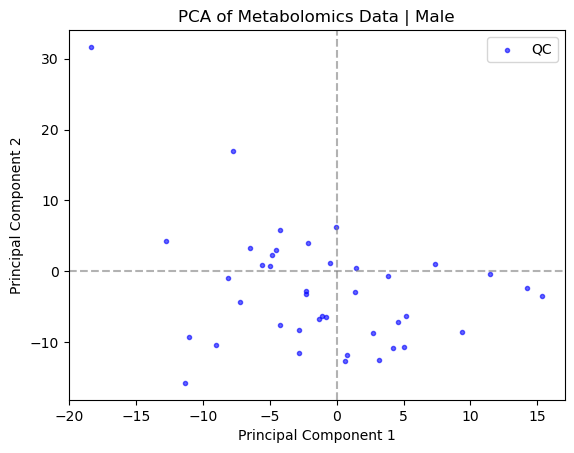

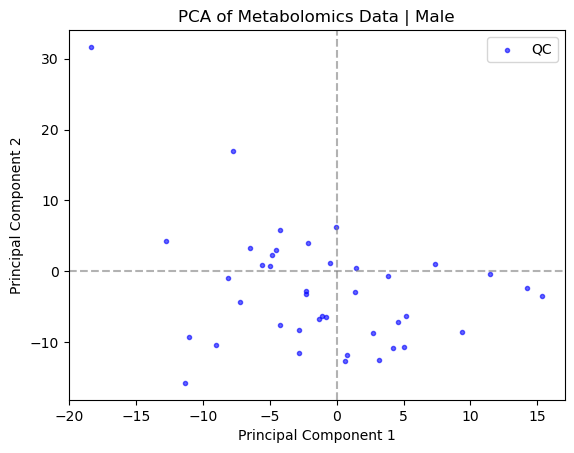

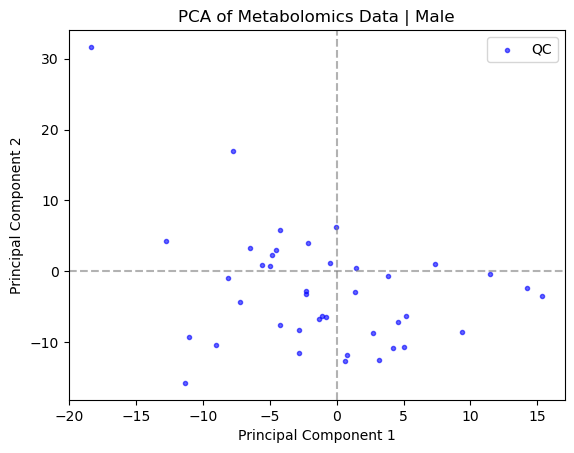

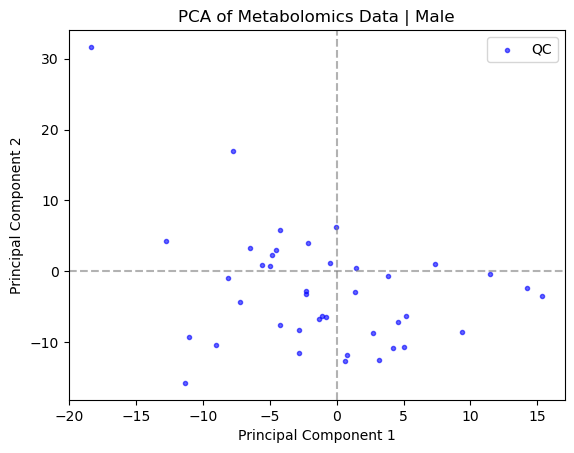

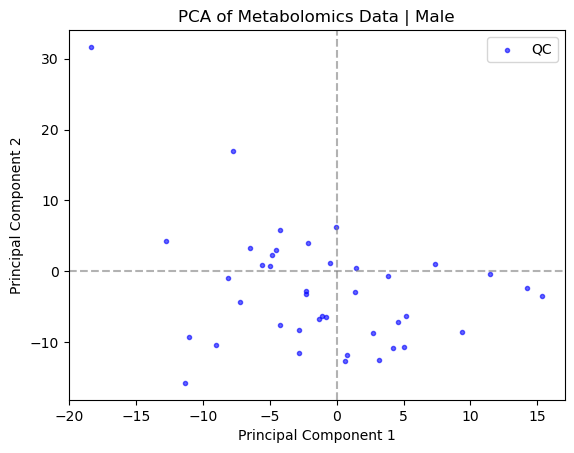

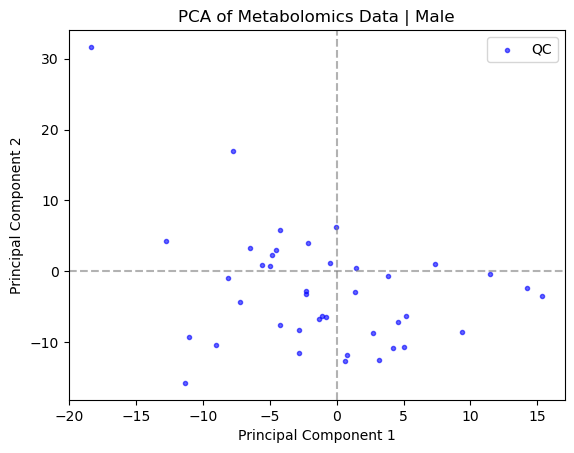

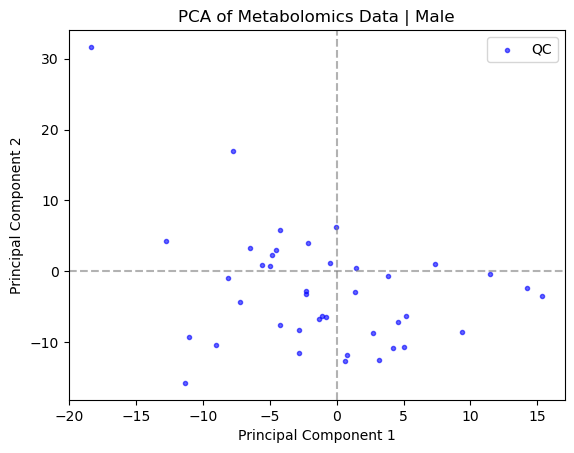

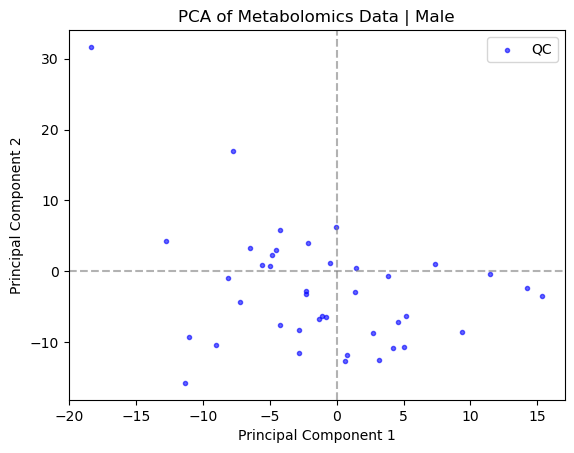

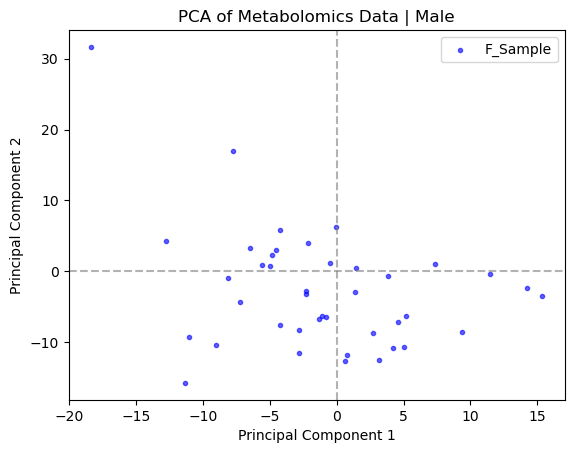

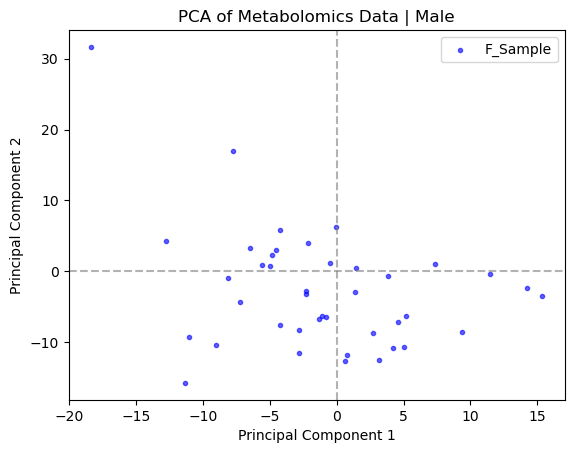

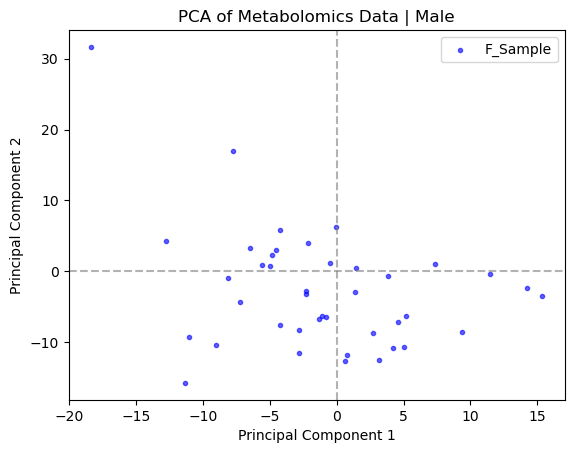

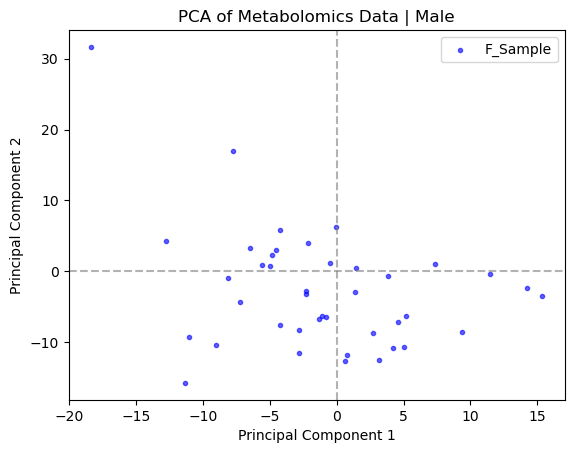

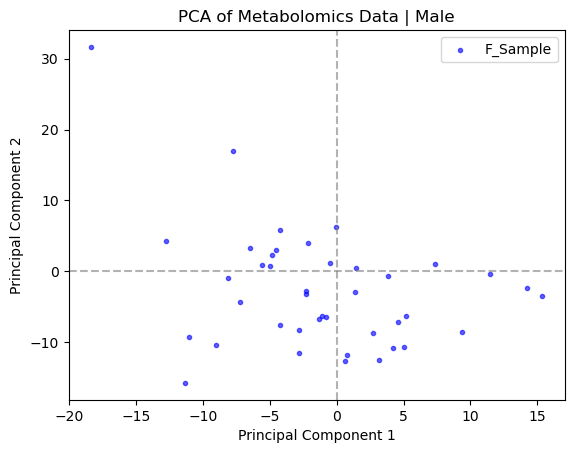

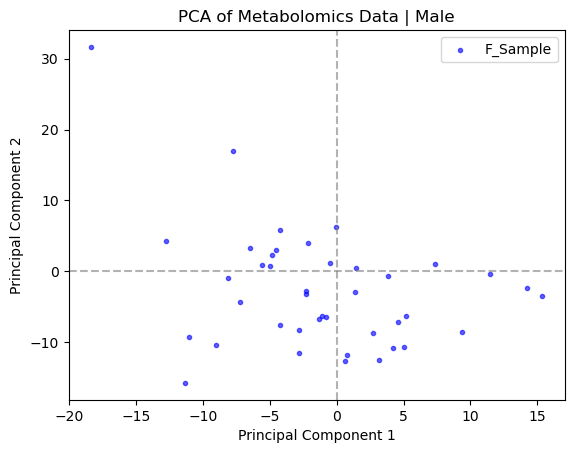

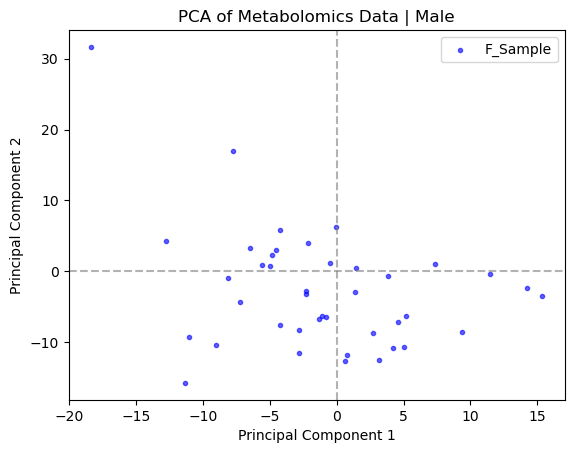

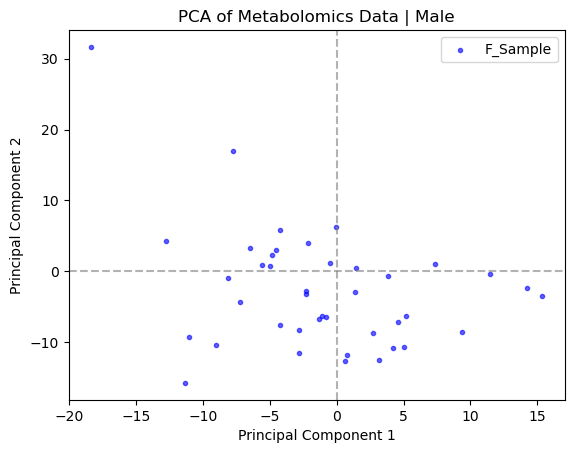

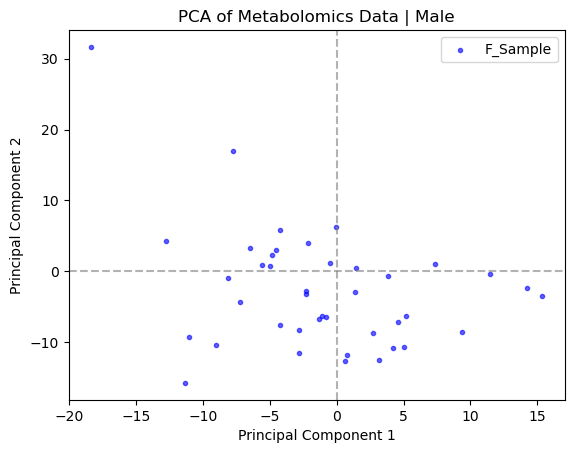

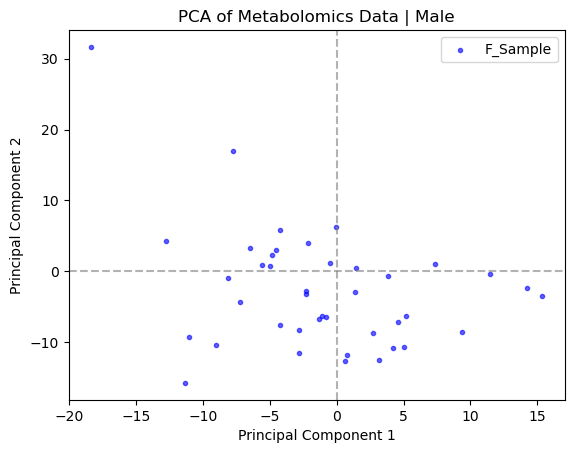

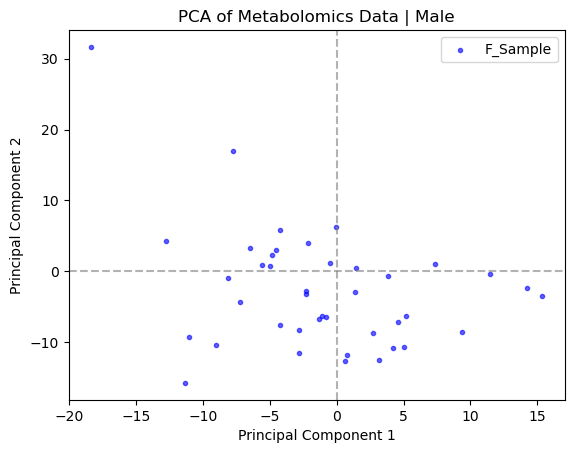

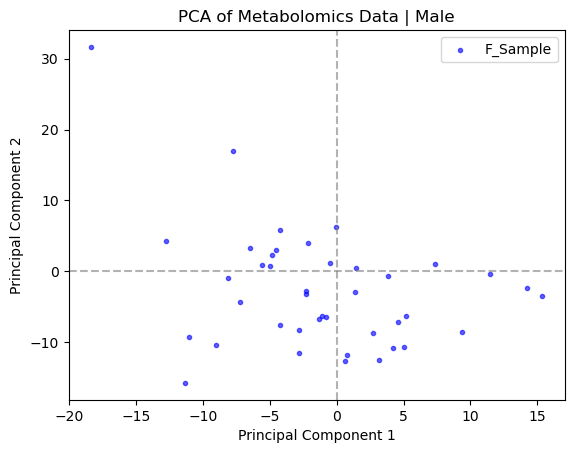

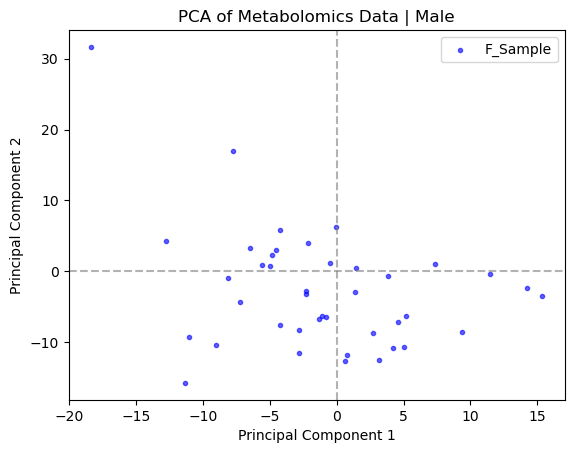

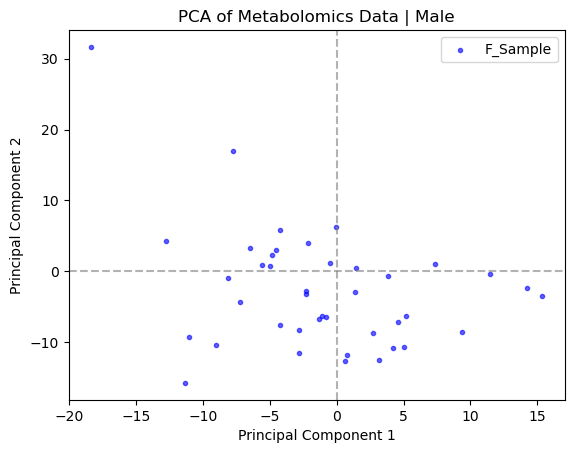

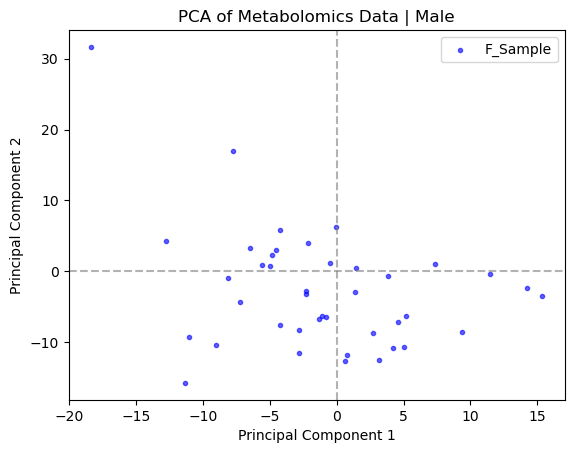

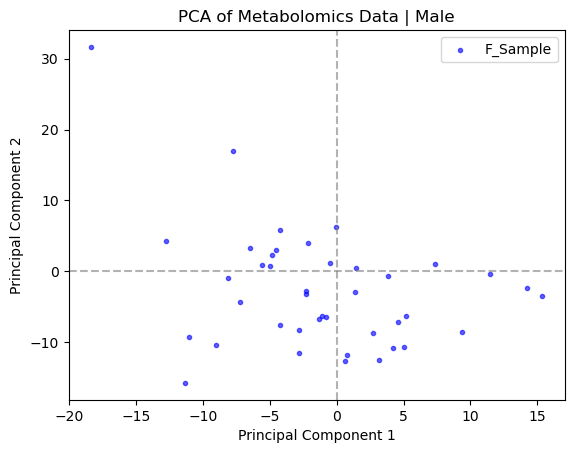

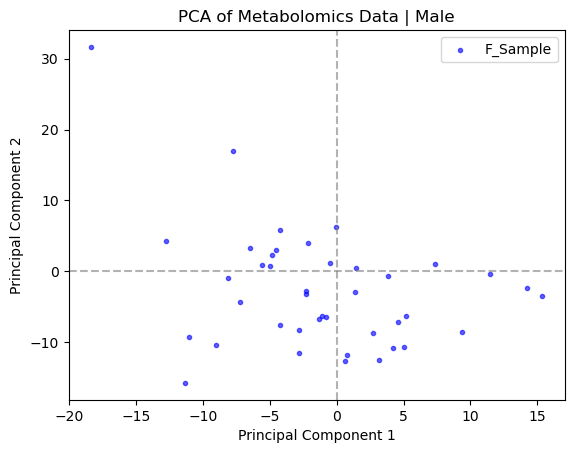

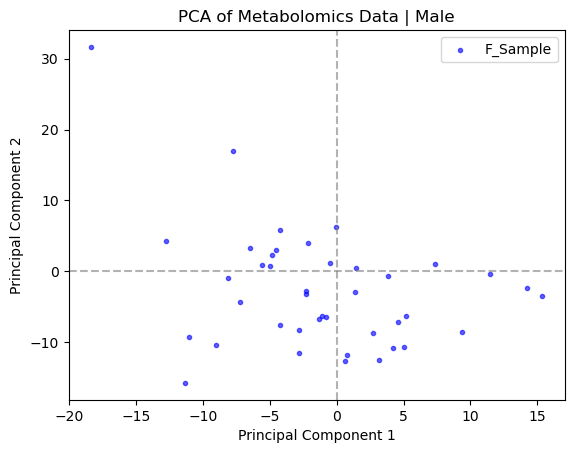

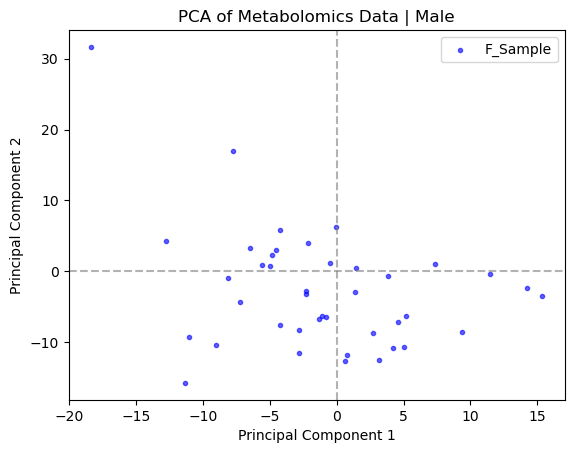

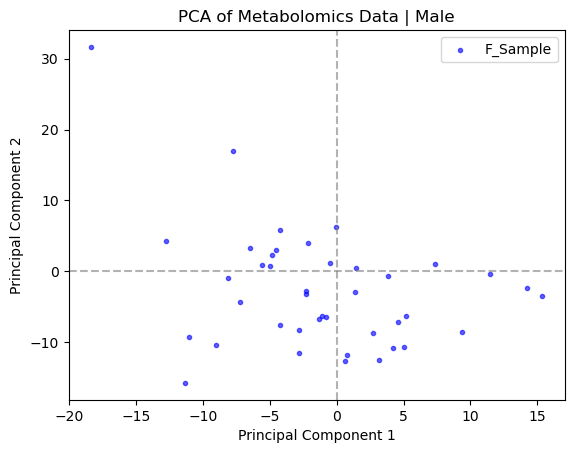

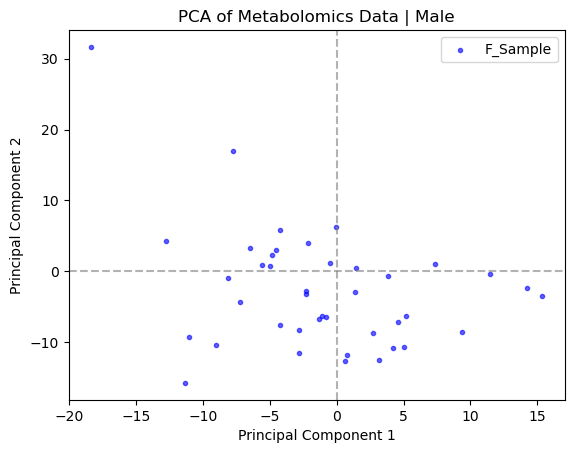

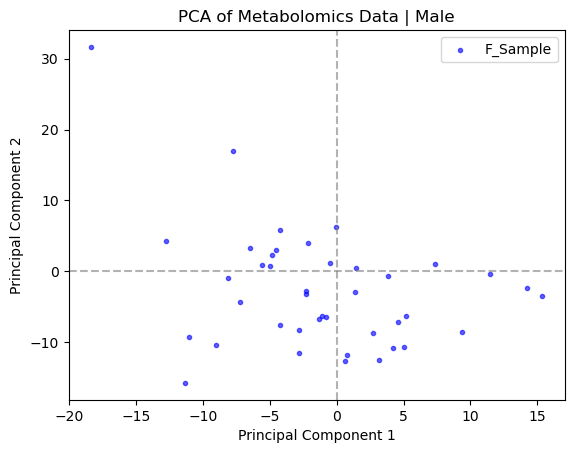

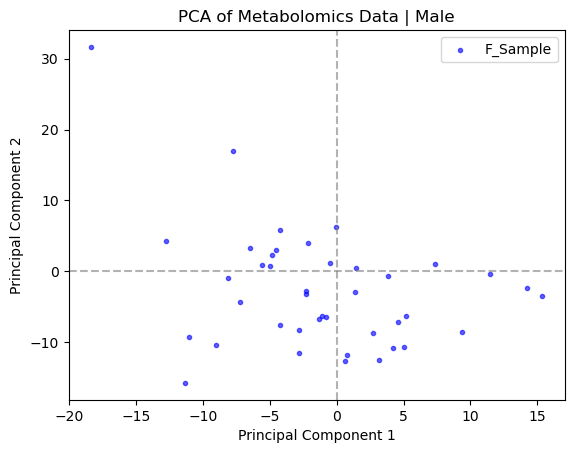

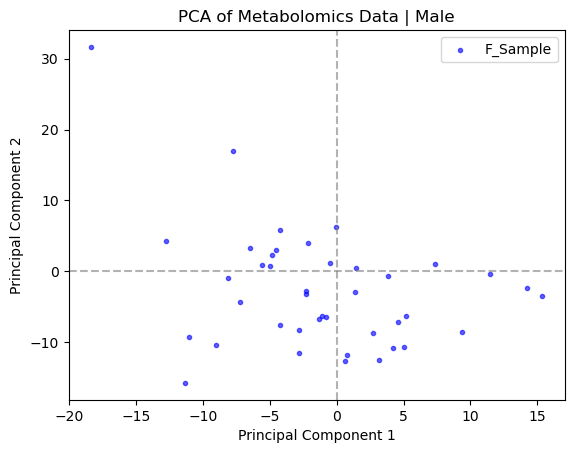

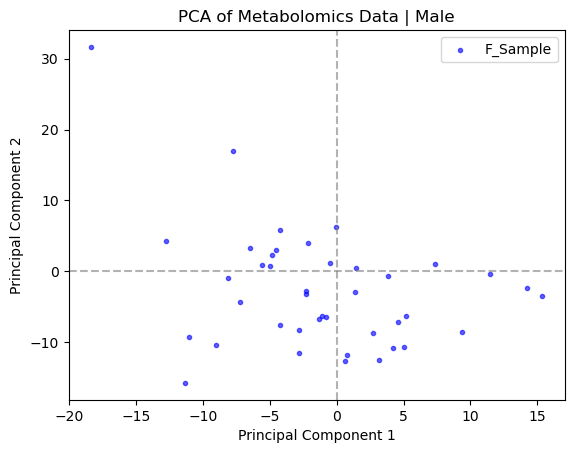

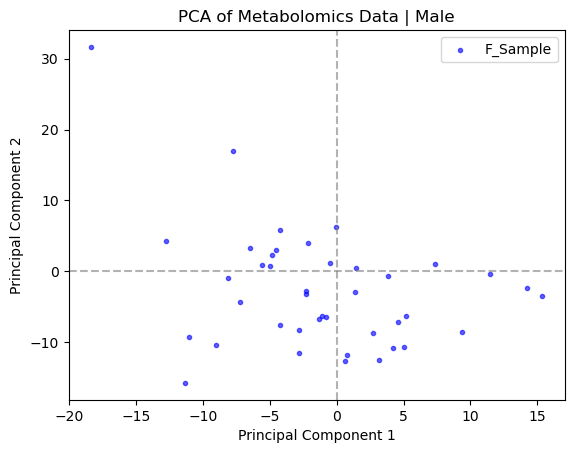

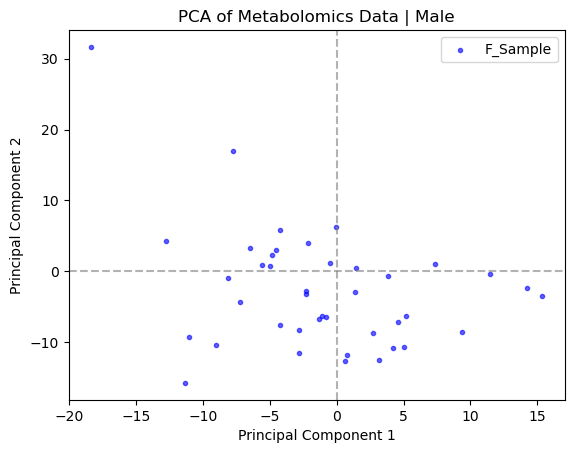

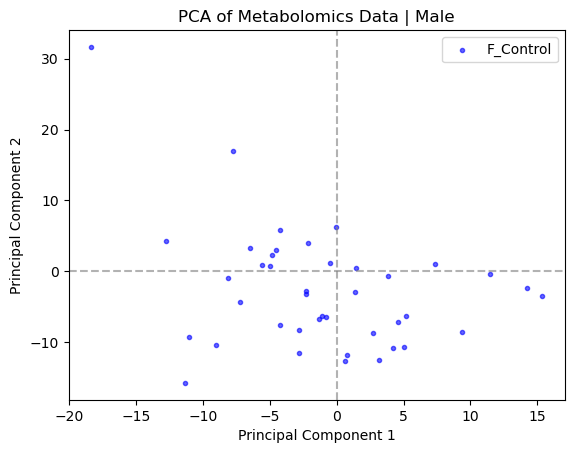

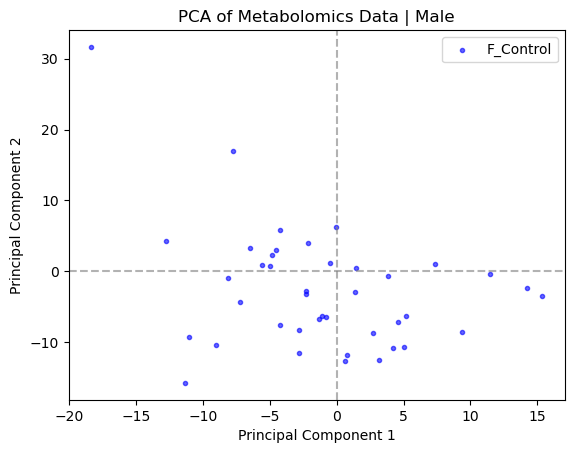

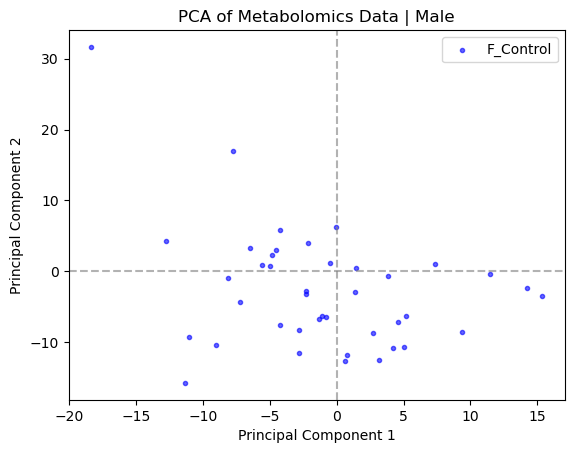

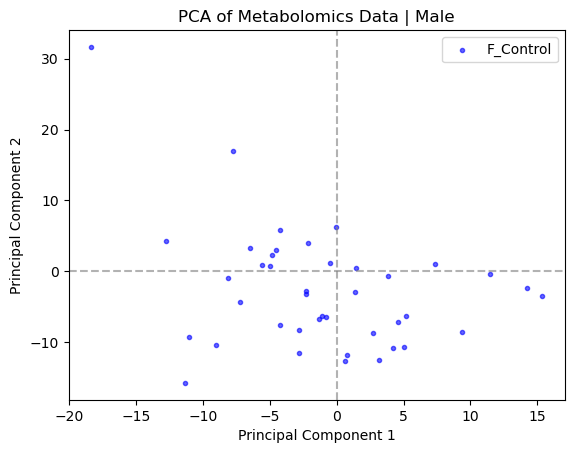

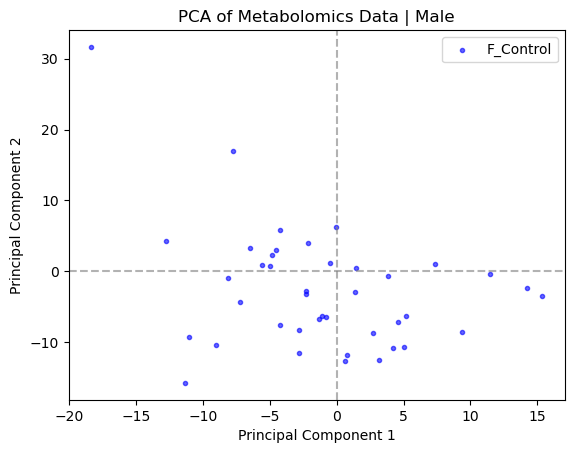

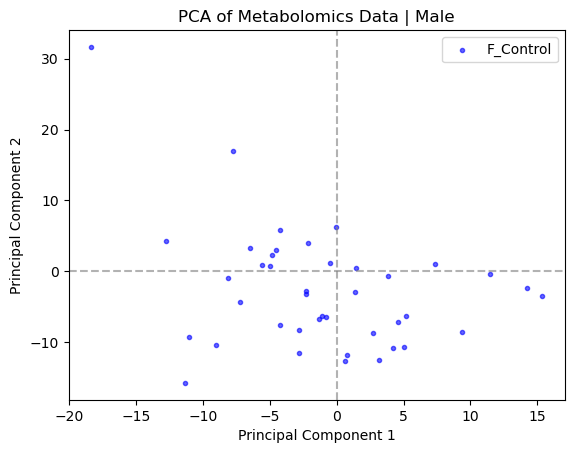

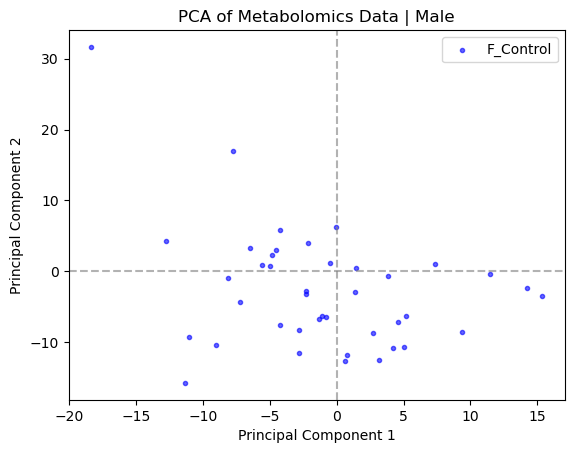

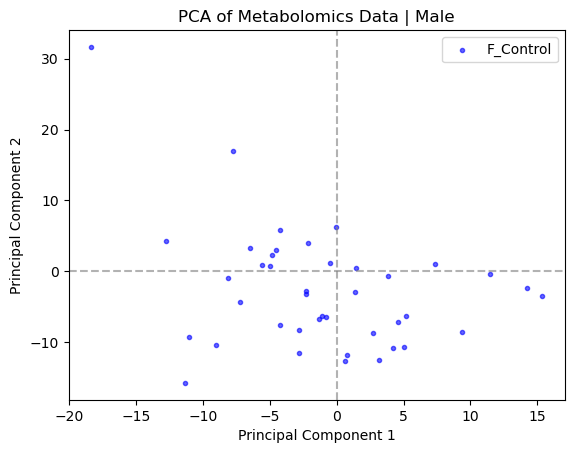

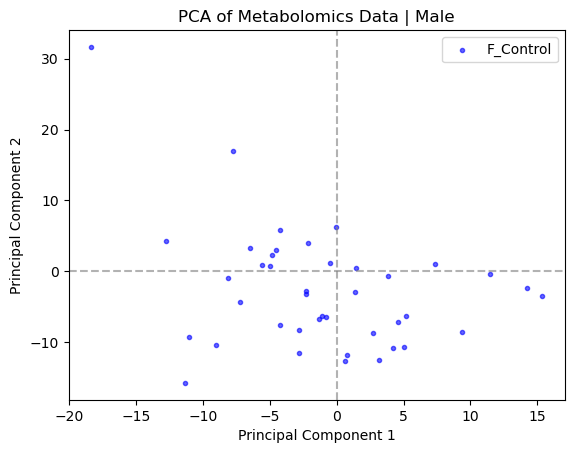

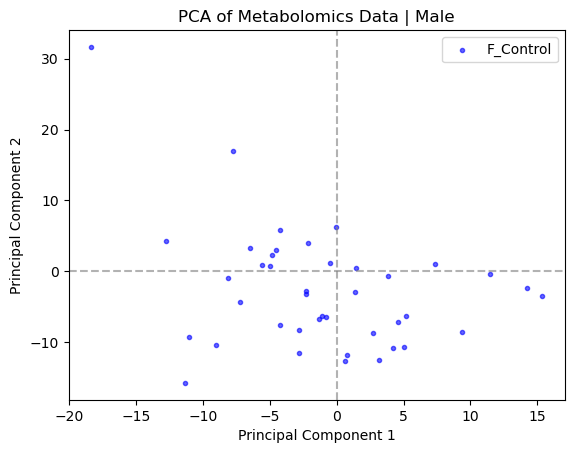

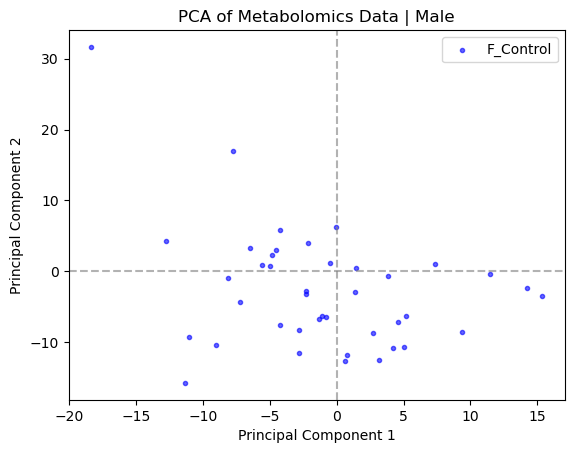

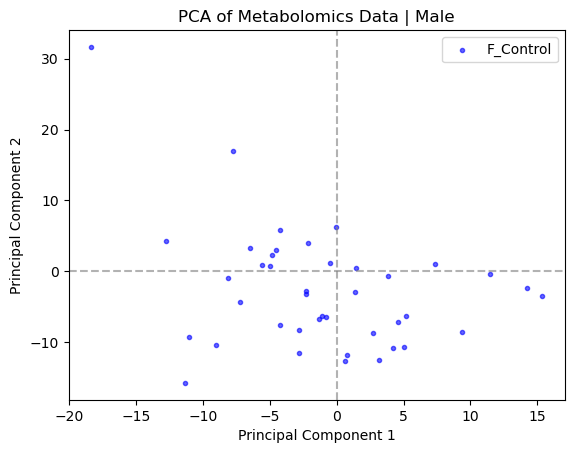

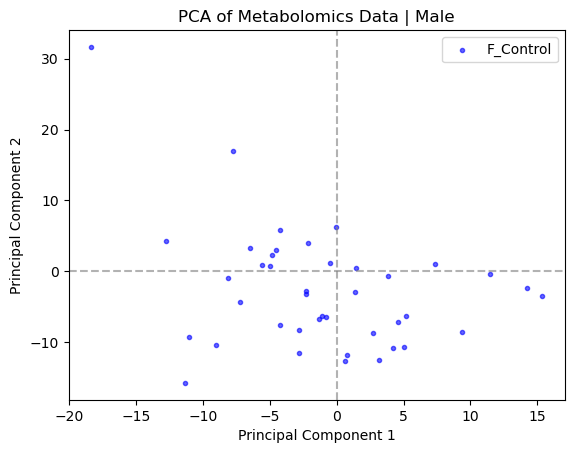

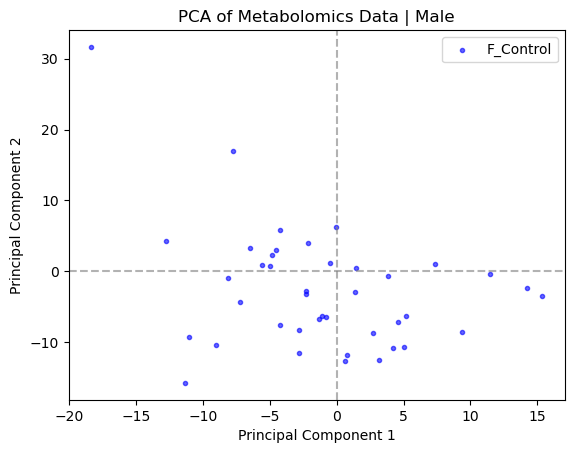

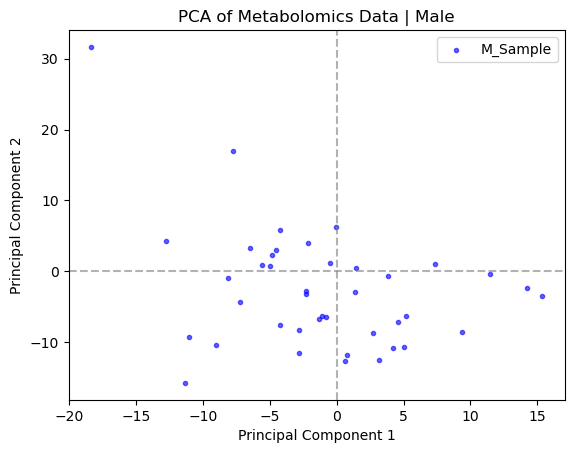

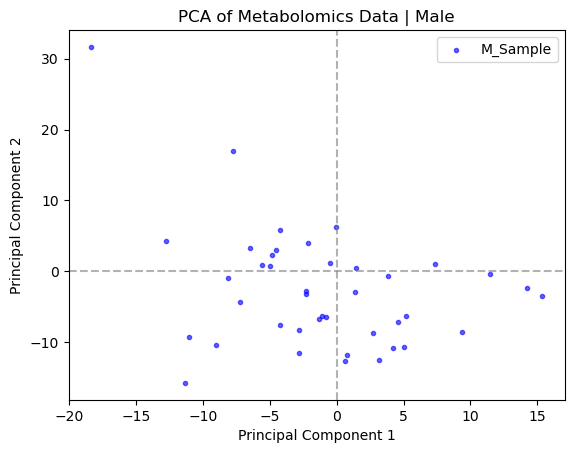

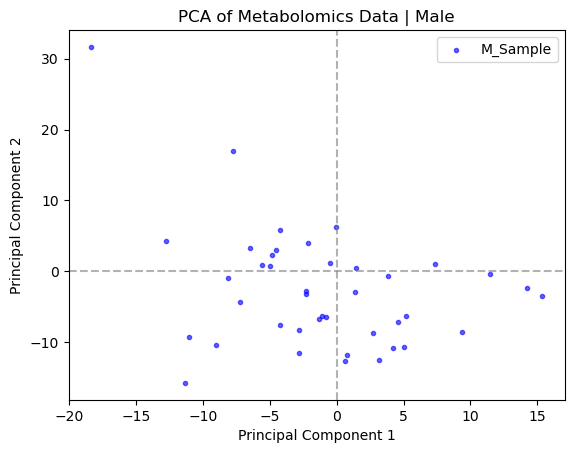

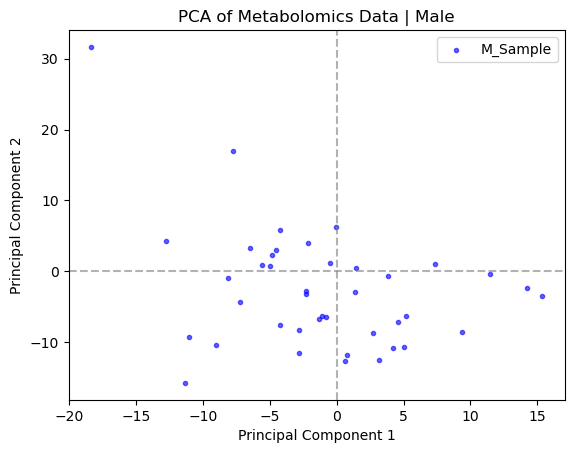

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
for label, subset in categories.items():
    
    if label == "Blank" or label == 'QC':
        continue

    plt.figure(figsize=(8, 8))
    
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.6, color=colors[label], marker=markers[label])

    plt.axhline(y = 0, color='grey', linestyle='--', alpha=0.6)
    plt.axvline(x = 0, color='grey', linestyle='--', alpha=0.6)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"PCA of Metabolomics Data | {label}")
    plt.legend()
    plt.show()